In [1]:
import numpy as np
import matplotlib.pyplot as plt
from core.ode import define_vqs_ode, define_schrodinger_ode
from core.integrators import euler, rk4

In [2]:
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]

# hs = [-2.0*J, -B, -B] # Hamiltonian non-dependent on time
hs = lambda t: [-2*J*np.cos(t), -B*np.cos(t), -B*np.sin(t)] # Hamiltonian parameters dependent on time # FAKE DATA FTW

opsH = ["ZZ", "XI", "IX"]

state = np.ones(4, dtype=complex)/2

# Time discretization
dt = 0.01
Nt = 10

In [3]:
ode = define_vqs_ode(ops, opsH, fs, hs, state, analytic=True)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)              # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)                # Integrate in time!

Text(0.5, 1.0, 'Analytic')

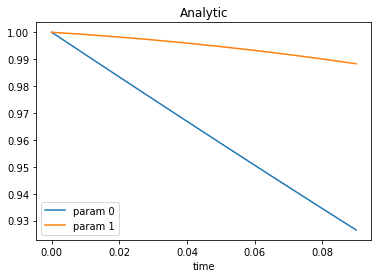

In [4]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [5]:
# Through the circuit

ode = define_vqs_ode(ops, opsH, fs, hs, state)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt)  # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)    # Integrate in time!

Text(0.5, 1.0, 'Circuit')

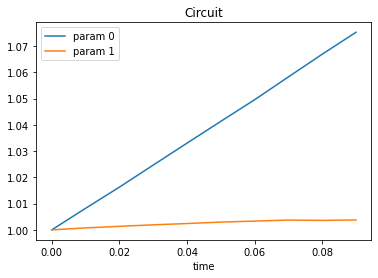

In [6]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [7]:
# Solve the schrodinger equation directly
schrodinger = define_schrodinger_ode(opsH, hs)

state_evolved = euler(schrodinger, state, dt, Nt)